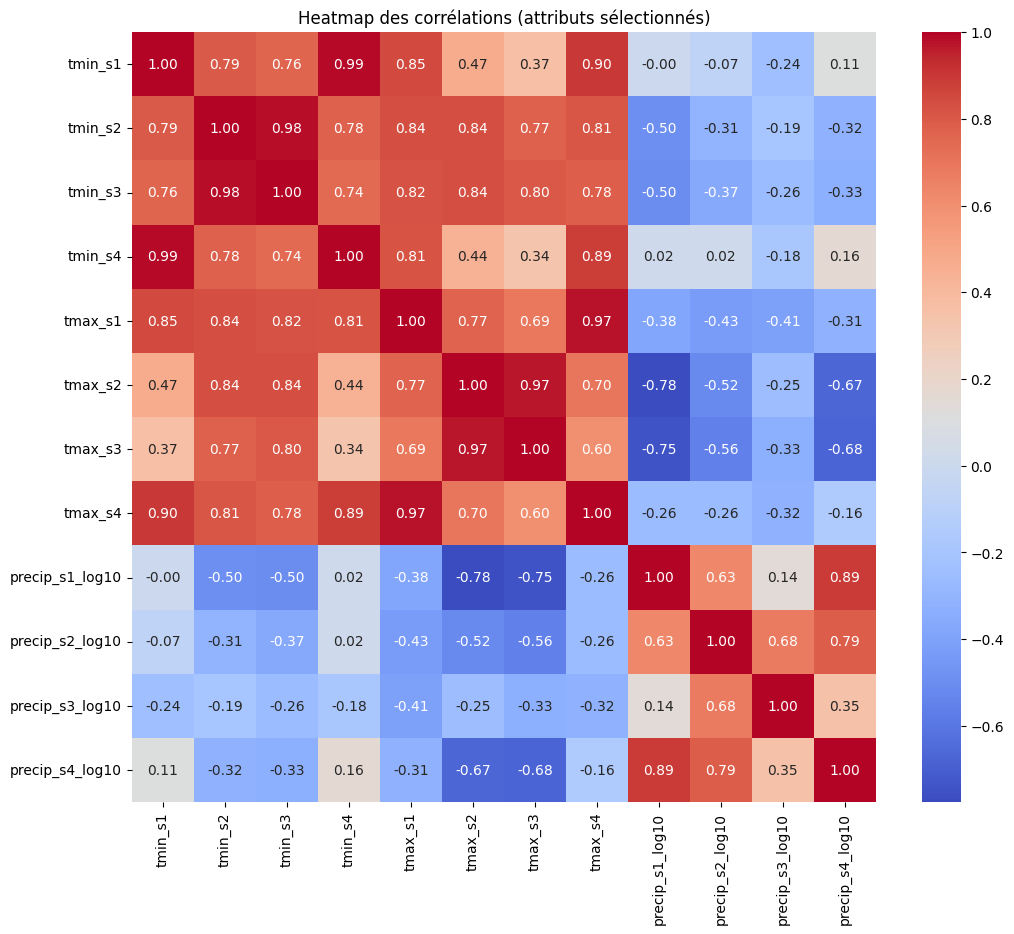

In [ ]:
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt

# Charger ton fichier
gdf = gpd.read_file("/content/drive/MyDrive/data_set/merge/clean/transformation final/final_data_set_fire.gpkg")

# ---- Choisir les attributs pour la heatmap ----
colonnes = [
    "tmin_s1", "tmin_s2", "tmin_s3", "tmin_s4",
    "tmax_s1", "tmax_s2", "tmax_s3", "tmax_s4",
    "precip_s1_log10", "precip_s2_log10", "precip_s3_log10", "precip_s4_log10",

]

# Filtrer seulement les colonnes qui existent dans le fichier
cols_exist = [c for c in colonnes if c in gdf.columns]

# Calculer la matrice de corrélation
corr = gdf[cols_exist].corr()

# ---- Tracer la heatmap ----
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Heatmap des corrélations (attributs sélectionnés)")
plt.show()


In [ ]:
print(gdf.columns)


Index(['fire', 'tmin_s1', 'tmin_s2', 'tmin_s3', 'tmin_s4', 'tmax_s1',
       'tmax_s2', 'tmax_s3', 'tmax_s4', 'precip_s1', 'precip_s2', 'precip_s3',
       'precip_s4', 'ndvi1', 'elevation1', 'aspect1', 'fid_3', 'ID', 'DB_ID',
       'FAO90', 'WRB4', 'SHARE', 'COARSE', 'SAND', 'SILT', 'CLAY', 'USDA',
       'SOTER', 'BULK', 'REF_BULK', 'ORG_CARBON', 'PH_WATER', 'TOTAL_N',
       'CN_RATIO', 'CEC_SOIL', 'CEC_CLAY', 'CEC_EFF', 'TEB', 'BSAT',
       'ALUM_SAT', 'ESP', 'TCARBON_EQ', 'GYPSUM', 'ELEC_COND', 'fid_2', 'ID_2',
       'GRIDCODE', 'AREA', 'LCCCODE', 'source', 'precip_s1_log10',
       'precip_s2_log10', 'precip_s3_log10', 'precip_s4_log10', 'geometry'],
      dtype='object')


Colonnes utilisées pour la heatmap : ['COARSE', 'SAND', 'SILT', 'CLAY', 'BULK', 'REF_BULK', 'ORG_CARBON', 'PH_WATER', 'TOTAL_N', 'CN_RATIO', 'CEC_SOIL', 'CEC_CLAY', 'CEC_EFF', 'TEB', 'BSAT', 'ALUM_SAT', 'ESP', 'TCARBON_EQ', 'GYPSUM', 'ELEC_COND', 'ndvi1']


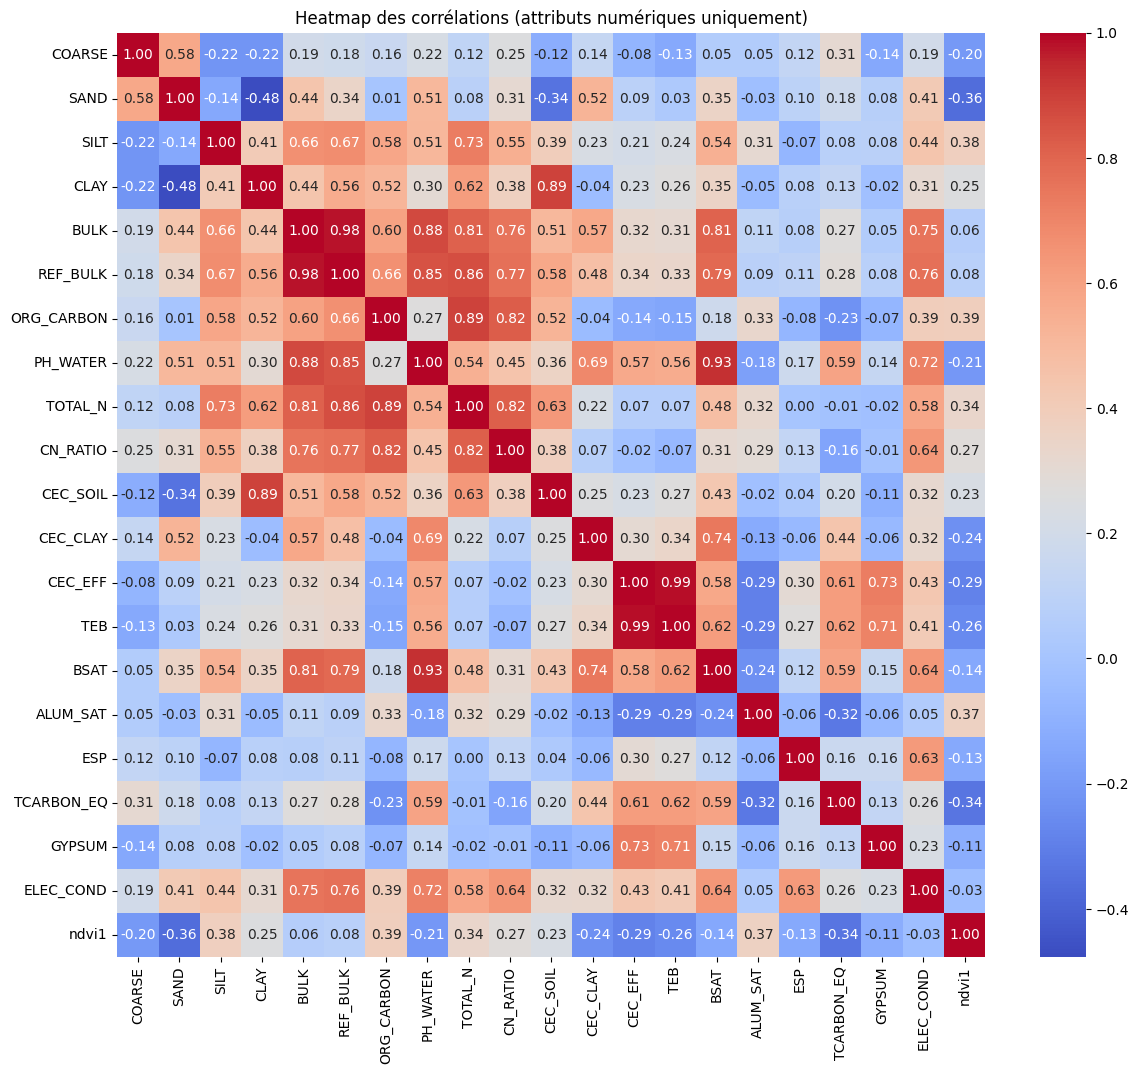

In [ ]:
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt

# Charger ton fichier
gdf = gpd.read_file("/content/drive/MyDrive/data_set/merge/clean/transformation final/final_data_set_fire.gpkg")

# ---- Choisir les attributs pour la heatmap ----
colonnes = [
    'COARSE', 'SAND', 'SILT', 'CLAY', 'USDA',
    'SOTER', 'BULK', 'REF_BULK', 'ORG_CARBON', 'PH_WATER', 'TOTAL_N',
    'CN_RATIO', 'CEC_SOIL', 'CEC_CLAY', 'CEC_EFF', 'TEB', 'BSAT',
    'ALUM_SAT', 'ESP', 'TCARBON_EQ', 'GYPSUM', 'ELEC_COND','ndvi1'
]

# 1. Garder seulement les colonnes existantes
cols_exist = [c for c in colonnes if c in gdf.columns]

# 2. Garder seulement les colonnes numériques (évite "could not convert string to float")
cols_num = [c for c in cols_exist if gdf[c].dtype != "object"]

print("Colonnes utilisées pour la heatmap :", cols_num)

# 3. Matrice de corrélation
corr = gdf[cols_num].corr()

# ---- Tracer la heatmap ----
plt.figure(figsize=(14, 12))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Heatmap des corrélations (attributs numériques uniquement)")
plt.show()


In [ ]:
coarse --> info silt clay sand soil_type
ref_bulk
C/n = orag_car / total_n
cec_eff,teb
CEC_SOIL
cec_clay
bsat
gypsum, esp --> elec_cond
ELEC_COND

In [ ]:
import geopandas as gpd

# Charger le fichier
gdf = gpd.read_file("/content/drive/MyDrive/data_set/merge/clean/transformation final/final_data_set_fire.gpkg")

print(gdf.columns)

Index(['fire', 'tmin_s1', 'tmin_s2', 'tmin_s3', 'tmin_s4', 'tmax_s1',
       'tmax_s2', 'tmax_s3', 'tmax_s4', 'precip_s1', 'precip_s2', 'precip_s3',
       'precip_s4', 'ndvi1', 'elevation1', 'aspect1', 'fid_3', 'ID', 'DB_ID',
       'FAO90', 'WRB4', 'SHARE', 'COARSE', 'SAND', 'SILT', 'CLAY', 'USDA',
       'SOTER', 'BULK', 'REF_BULK', 'ORG_CARBON', 'PH_WATER', 'TOTAL_N',
       'CN_RATIO', 'CEC_SOIL', 'CEC_CLAY', 'CEC_EFF', 'TEB', 'BSAT',
       'ALUM_SAT', 'ESP', 'TCARBON_EQ', 'GYPSUM', 'ELEC_COND', 'fid_2', 'ID_2',
       'GRIDCODE', 'AREA', 'LCCCODE', 'source', 'precip_s1_log10',
       'precip_s2_log10', 'precip_s3_log10', 'precip_s4_log10', 'geometry'],
      dtype='object')


In [ ]:
import geopandas as gpd

# Charger le fichier
gdf = gpd.read_file("/content/drive/MyDrive/data_set/merge/clean/transformation final/final_data_set_fire.gpkg")

# Suppression de plusieurs colonnes
gdf = gdf.drop(columns=["tmin_s4", "tmin_s3", "tmax_s3", "tmax_s4","fid_3","ID","DB_ID","ID_2","fid_2","ESP","GYPSUM","BSAT","CEC_EFF","CEC_CLAY","CEC_SOIL","CN_RATIO","BULK","REF_BULK","COARSE","SHARE","WRB4","FAO90","TCARBON_EQ","fid_3","USDA","SOTER","fid_2","ID_2","AREA","LCCCODE","source","precip_s1","precip_s2","precip_s3","precip_s4"])

# Sauvegarder le fichier
# gdf.to_file("/content/drive/MyDrive/data_mining/data_set_fire_perc_log10.gpkg", driver="GPKG")

print("Colonnes supprimées et fichier sauvegardé.")


Colonnes supprimées et fichier sauvegardé.


In [ ]:
print(gdf.columns)

Index(['fire', 'tmin_s1', 'tmin_s2', 'tmax_s1', 'tmax_s2', 'ndvi1',
       'elevation1', 'aspect1', 'SAND', 'SILT', 'CLAY', 'ORG_CARBON',
       'PH_WATER', 'TOTAL_N', 'TEB', 'ALUM_SAT', 'ELEC_COND', 'GRIDCODE',
       'precip_s1_log10', 'precip_s2_log10', 'precip_s3_log10',
       'precip_s4_log10', 'geometry'],
      dtype='object')


In [ ]:
gdf.to_file("/content/drive/MyDrive/data_set/merge/clean/feature_extraction/data_final.gpkg", driver="GPKG")